In [1]:
# Main library: https://square.github.io/pysurvival/index.html
#----------------------------Reproducible------------------------------------------
import numpy as np
import random as rn
import pandas as pd
import gc
import os

seed=0
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
rn.seed(seed)

#----------------------------Reproducible------------------------------------------

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.model_selection import train_test_split
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.utils.display import display_loss_values
from pysurvival.utils.display import compare_to_actual

from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from scipy import stats

import heapq
import seaborn as sns

In [2]:
def csv_read(p_path):
    pd_data=pd.read_csv(p_path, sep=',',header=None)
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),column_names

def csv_read_with_header(p_path):
    pd_data=pd.read_csv(p_path, sep=',')
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),np.array(column_names)

def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t",f_t, p_value_t)
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",f_t, p_value_t)
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",f, p_value)
    print("-"*80)
    print("\n")

Compared groups 40




./25/feature_selection.csv
./3/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCIDEM', 'NACCVASC', 'NACCAGEB'}
selected_features_common {'NACCAGEB', 'NACCAGE'}
selected_features_diff {'NACCIDEM', 'NACCVASC'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8 8 8 0 8 8 1
 8 0 0 1 8 1 8 8 1 8 0 1 8 0 8 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 8 0 0 0 0 0
 0 8 8 8 0 0 0 8 0 8 0 1 8 8 8 0 1 8 0 8 1 1 1 0 8 8 1 1 8 0 1 8 8 1 0 1 1
 1 1 0 0 8 0 8 8 0 0 0 8 8 1 8 0 8 8 1 1 0 8 1 1 0 1 0 0 0 1 1 8 0 8 1 0 0
 1 0 0 0 

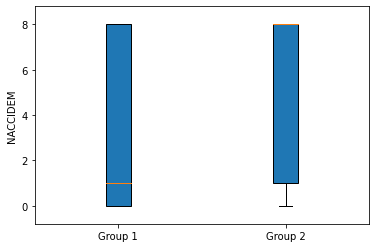



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

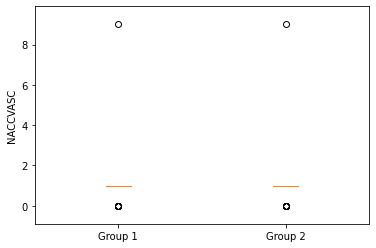

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./25/feature_selection.csv
./32/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCIDEM', 'NACCVASC', 'NACCAGEB', 'RACETER'}
selected_features_common {'NACCAGE'}
selected_features_diff {'NACCIDEM', 'NACCAGEB', 'RACETER', 'NACCVASC'}
--------------------------------------------------
All different features 4




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8

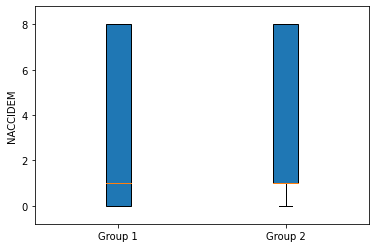



--------------------------------------------------------------------------------
Group 1: [65 85 79 82 59 51 84 80 67 67 71 76 73 75 69 86 64 85 52 86 82 74 84 70
 47 72 60 85 84 76 71 78 75 80 61 85 67 83 65 57 67 82 83 72 61 29 73 66
 66 99 69 82 61 63 73 85 83 79 72 58 80 70 78 68 83 83 73 79 72 80 65 77
 87 83 56 65 75 72 91 79 85 72 93 73 73 72 71 59 76 78 87 74 74 91 78 72
 59 80 85 86 52 77 47 76 62 74 70 86 65 65 70 61 71 88 85 96 74 74 54 75
 73 69 86 71 35 81 82 73 78 70 70 84 73 74 60 51 93 83 74 61 85 63 82 63
 76 79 76 72 63 83 83 74 58 70 77 59 68 70 81 73 69 59 65 83 85 95 67 61
 75 75 82 83 73 84 70 65 84 88 82 59 82 78 80 85 78 66 55 47 57 77 75 73
 66 72 65 84 66 74 72 68 83 78 76 60 75 78 86 78 74 75 72 68 76 62 62 81
 67 52 61 64 80 59 91 90 74 81 78 72 79 78 72 78 95 77 62 80 64 73 65 73
 61 59 72 28 66 71 52 74 70 74 81 77 75 75 92 75 76 84 78 75 74 35 70 67
 80 60 73 70 70 83 65 88 96 62 59 72 69 66 68 86 84 77 74 76 73 74 78 46
 64 75 69 75 76 75 72 86 83 76 7

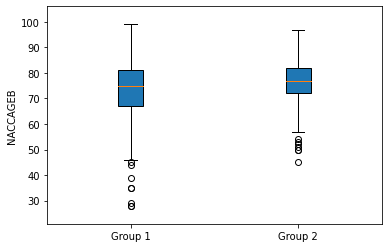



--------------------------------------------------------------------------------
Group 1: [88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 99 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 3 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88

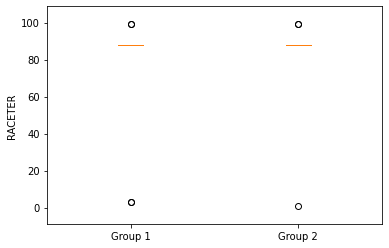



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

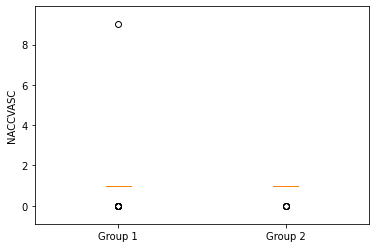

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./25/feature_selection.csv
./4/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCIDEM', 'NACCPPA', 'NACCVASC', 'NACCAGEB'}
selected_features_common {'NACCAGEB'}
selected_features_diff {'NACCIDEM', 'NACCAGE', 'NACCPPA', 'NACCVASC'}
--------------------------------------------------
All different features 4




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8 

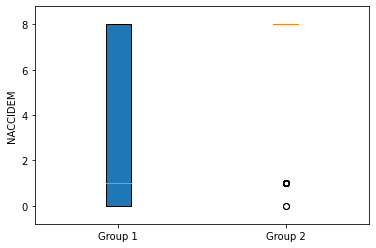



--------------------------------------------------------------------------------
Group 1: [72 90 82 84 66 52 90 90 67 71 75 76 74 76 74 93 65 85 52 89 91 80 91 71
 50 82 62 94 92 79 72 86 76 81 63 91 73 87 66 62 77 83 85 78 71 31 76 73
 71 99 70 92 61 64 76 95 91 91 74 63 93 73 90 69 91 86 74 85 73 80 73 87
 96 92 58 69 89 74 96 83 91 84 96 77 74 82 76 60 79 90 98 80 74 96 81 81
 60 83 92 87 57 82 50 78 66 77 74 100 71 66 73 62 76 92 88 96 74 85 56 81
 84 70 88 74 41 84 84 78 81 79 72 93 80 77 61 52 101 93 83 61 96 68 85 64
 85 85 77 75 65 90 88 76 61 77 78 60 69 74 81 76 70 65 66 94 95 99 68 69
 81 78 90 94 85 95 81 75 89 95 83 60 89 86 87 91 81 69 55 49 58 91 82 85
 70 82 65 86 68 76 72 73 86 82 79 72 76 90 92 80 77 76 75 69 79 67 62 87
 68 55 63 67 83 62 94 93 75 91 79 81 82 81 72 78 103 78 64 81 65 81 66 75
 62 60 80 30 72 73 52 77 76 80 90 86 79 75 98 78 78 93 87 78 85 43 77 68
 91 62 74 73 76 83 70 91 103 64 68 84 77 71 71 97 95 84 80 83 76 79 85 48
 73 81 72 82 78 86 74 88 87 

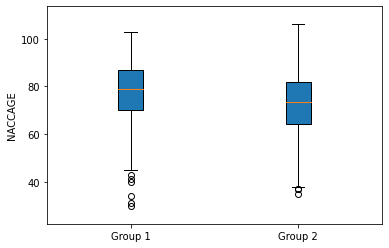



--------------------------------------------------------------------------------
Group 1: [0 8 0 0 0 0 0 0 0 0 0 8 0 0 8 0 0 8 0 0 0 0 0 1 0 8 0 7 0 0 0 8 7 0 0 0 0
 0 0 7 7 0 0 0 0 0 8 8 8 0 7 0 0 0 0 0 8 8 0 1 8 0 8 0 0 0 1 0 7 8 0 7 8 8
 1 0 8 0 0 0 8 7 0 0 1 0 0 0 0 7 8 7 1 0 0 0 0 8 8 7 8 7 0 0 8 0 0 8 1 1 0
 0 0 0 8 0 0 8 0 0 7 0 8 0 0 0 0 0 8 0 0 8 0 0 0 0 0 7 8 8 7 0 0 0 8 0 0 0
 1 8 8 1 0 0 0 0 0 1 7 0 0 0 1 8 8 8 1 8 7 0 8 8 8 8 8 8 0 0 0 0 7 8 8 0 7
 8 0 0 1 8 7 8 0 7 0 0 0 0 0 1 8 0 0 8 0 0 0 1 7 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 7 0 8 0 0 7 8 0 1 0 0 1 7 0 0 0 0 7 0 0 0 0 0 7 8 8 0 0 0 8 0 0 8 8
 0 8 8 0 0 7 7 8 8 0 0 0 8 7 1 8 7 8 8 0 7 0 7 0 0 8 0 0 0 0 0 0 8 0 8 0 0
 0 7 7 1 0 0 0 1 8 0 0 8 0 0 0 8 0 1 0 0 1 0 0 0 0 1 1 7 0 0 1 0 0 8 0 1 8
 0 1 0 7 1 1 0 0 8 0 7 0 8 0 8 1 1 8 7 1 0 0 1 8 0 0 7 0 0 1 8 0 0 7 7 8 0
 0 1 8 8 8 0 8 0 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 1 8 0 8 0 0 7 0 8 0 7
 7 0 0 8 0 8 0 8 8 7 8 0 0 0 8 0 7 0 0 0 0 0 0 8 0 1 8 7 0 1 8 0 0 1 0 8 8
 0 0 0 0

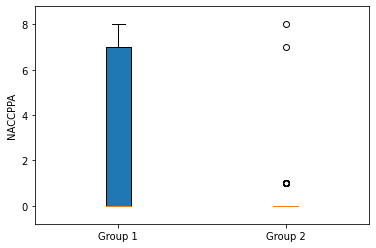



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

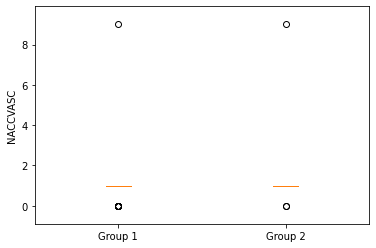

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./25/feature_selection.csv
./49/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NPWBRWT', 'NACCVASC', 'NACCAGEB'}
selected_features_common {'NACCAGEB', 'NACCAGE'}
selected_features_diff {'NPWBRWT', 'NACCVASC'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [1279 1160 1100 1210 897 1452 1270 1310 1164 1430 9999 1358 1320 1280 1020
 1130 1130 1499 1353 1174 1002 1160 1075 1199 1303 1170 1189 1190 1110
 1160 980 1168 1069 1100 1381 1150 1160 1060 1150 1170 1350 1190 1410 994
 1120 1040 1120 1310 1340 1220 1315 1080 1000 1492 1210 970 1126 1252 1370
 1200 1130 940 1

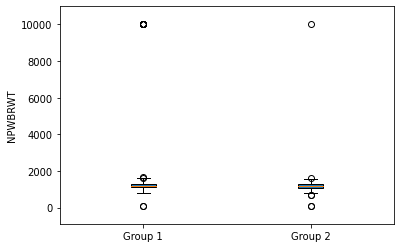



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

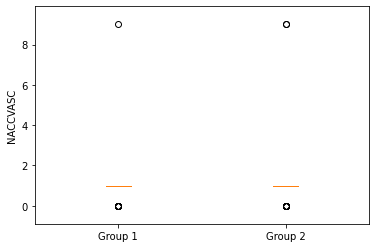

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./25/feature_selection.csv
./51/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCIDEM', 'NACCVASC', 'NACCAGEB'}
selected_features_common {'NACCAGEB', 'NACCAGE'}
selected_features_diff {'NACCIDEM', 'NACCVASC'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [0 0 8 1 0 8 0 1 8 8 8 0 8 1 0 0 8 0 0 1 1 1 1 8 1 0 8 0 1 1 8 0 0 8 1 0 8
 1 8 1 0 1 8 1 1 1 0 0 0 0 0 1 8 8 8 1 0 0 1 8 0 8 0 8 1 1 8 1 8 0 1 0 0 0
 1 8 0 1 1 8 0 0 1 8 8 1 1 8 8 1 0 0 8 0 1 1 8 0 0 0 0 0 8 1 0 8 0 0 8 1 8
 8 8 1 0 8 8 0 1 1 0 8 1 1 1 1 8 1 0 1 8 0 0 1 1 8 0 0 0 0 0 8 8 8 0 8 8 1
 8 0 0 1 

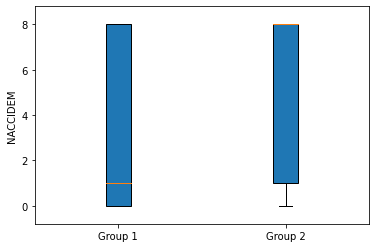



--------------------------------------------------------------------------------
Group 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1

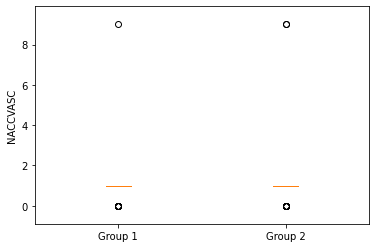

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./28/feature_selection.csv
./35/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCDAGE', 'NACCAGEB'}
selected_features_common {'NACCDAGE', 'NACCAGEB', 'NACCAGE'}
selected_features_diff set()
--------------------------------------------------
All different features 0


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./28/feature_selection.csv
./39/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NPPATH3', 'NACCIDEM', 'DECIN', 

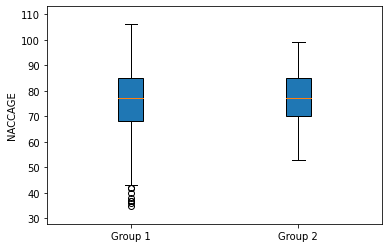



--------------------------------------------------------------------------------
Group 1: [0 0 0 ... 0 0 0]
Average of Group 1: 0.09306742640075974
Group 2: [1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Average of Group 2: 0.10526315789473684
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.034236871786791266, pvalue=0.8532366114052294)
Test: f_t, p_value_t -0.18503208312828145 0.8532366114051249
ANOVA: f, p_value: 0.03423687178679127 0.8532366114052294
--------------------------------------------------------------------------------




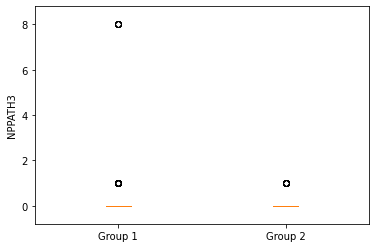



--------------------------------------------------------------------------------
Group 1: [0 0 8 ... 8 8 1]
Average of Group 1: 4.449192782526116
Group 2: [1 1 8 8 8 8 1 0 0 8 8 8 1 8 8 8 8 1 8 1 0 1 8 8 8 8 1 8 1 1 8 8 1 0 8 8 0
 1 0 8 1 1 8 8 0 8 1 8 8 8 8 8 8 8 0 8 8 8 1 0 8 8 1 8 8 0 8 8 0 8 8 8 8 1
 1 8 8 8 8 8 0 1 8 8 8 8 1 8 0 8 1 8 8 8 8]
Average of Group 2: 5.28421052631579
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.272239404378889, pvalue=0.03896400328168855)
Test: f_t, p_value_t -2.162912299911398 0.03264089902999317
ANOVA: f, p_value: 4.2722394043788965 0.03896400328168855
--------------------------------------------------------------------------------




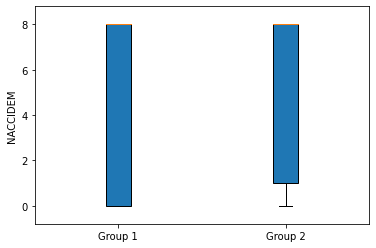



--------------------------------------------------------------------------------
Group 1: [1 0 1 ... 1 1 1]
Average of Group 1: 1.0427350427350428
Group 2: [1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 9 1 1 1 1 0 1 9 1 1 8 1 1 0
 1 0 9 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 9 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 8 1 1 1]
Average of Group 2: 1.4526315789473685
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.124858468300584, pvalue=0.04248801149886895)
Test: f_t, p_value_t -1.879855087289196 0.06300937189751826
ANOVA: f, p_value: 7.376248507433664 0.00670849293875261
--------------------------------------------------------------------------------




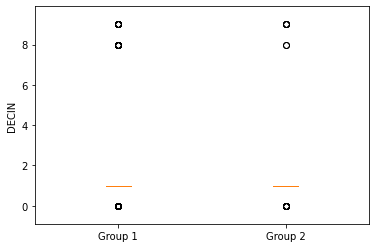



--------------------------------------------------------------------------------
Group 1: [77 90 70 ... 72 76 56]
Average of Group 1: 78.63817663817663
Group 2: [89 88 83 61 74 88 77 90 83 69 72 79 87 73 76 80 75 94 61 99 87 99 62 72
 83 82 75 80 87 100 84 66 78 80 94 85 82 82 86 86 81 83 82 62 99 74 90 82
 71 87 67 73 81 68 86 80 78 61 72 73 68 83 67 77 86 93 90 87 91 90 58 75
 69 80 90 90 70 94 63 66 91 88 82 84 76 80 103 89 91 86 76 92 66 67 67]
Average of Group 2: 80.2421052631579
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.5724070782360373, pvalue=0.058999254889650105)
Test: f_t, p_value_t -1.2804287242340973 0.20065349230606813
ANOVA: f, p_value: 1.6394977178437402 0.2006534923059393
--------------------------------------------------------------------------------




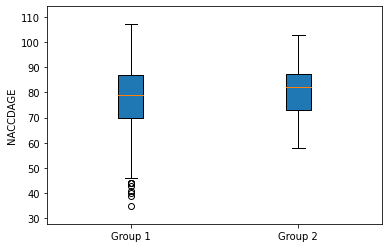



--------------------------------------------------------------------------------
Group 1: [65 85 67 ... 66 67 53]
Average of Group 1: 71.81101614434948
Group 2: [81 75 80 50 72 82 71 78 75 63 64 73 79 70 75 75 69 86 55 86 75 88 58 62
 74 73 71 75 78 88 76 62 70 73 83 75 73 76 80 74 74 74 80 50 88 63 82 72
 70 80 64 68 78 61 78 75 73 59 67 63 65 69 60 68 84 80 79 80 79 82 57 67
 63 67 86 88 63 84 58 59 83 78 75 75 73 73 92 81 83 84 70 91 55 66 59]
Average of Group 2: 73.03157894736842
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.6762255792409837, pvalue=0.10213147634590307)
Test: f_t, p_value_t -1.0627823197695978 0.2881045776972264
ANOVA: f, p_value: 1.1295062592148628 0.28810457769707154
--------------------------------------------------------------------------------




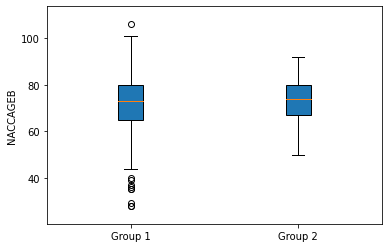

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./28/feature_selection.csv
./40/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCIDEM', 'NACCDAGE', 'NACCAGEB'}
selected_features_common {'NACCAGEB', 'NACCAGE'}
selected_features_diff {'NACCDAGE', 'NACCIDEM'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [77 90 70 ... 72 76 56]
Average of Group 1: 78.63817663817663
Group 2: [98 72 83 76 88 90 103 84 68 79 84 93 82 83 100 76 89 107 87 70 80 91 65
 69 90 74 87 82 71 89 97 91 92 74 75 85 82 77 84 73 87 82 72 72 87 88 95
 83 95 95 80 78 77 80 94 89 90 76 83 95 94 72 84 88 81 74 95 94 90 77 79
 84 77 96 78 84 97 

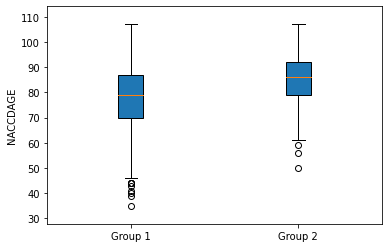



--------------------------------------------------------------------------------
Group 1: [0 0 8 ... 8 8 1]
Average of Group 1: 4.449192782526116
Group 2: [1 8 8 8 1 8 0 8 8 1 8 8 1 8 8 8 1 1 8 8 8 8 0 8 8 1 8 8 8 8 8 8 1 1 0 8 8
 8 0 8 8 8 8 8 8 8 1 8 1 8 8 1 8 8 0 8 8 8 8 1 1 8 8 8 8 8 8 1 1 8 1 1 1 1
 1 8 8 1 8 8 8 8 8 8 8 8 1 8 8 0 8 1 8 1 8 8 8 8 8 8 1 8 8 0 8 8 1 0 8 8 8
 8 1 1 1 0 8 8 1 8 8 8 1 1 8 8 0 0 1 1 8 8 1 0 0 8 8 1 8 8 8 8 8 0 0 1 8 0
 8 8 0 1 8 1 8 8 1 1 1 8 8 8 8 0 0 8 8 1 1 8 1 8 1 1 0 8 1 0 1 1 8 0 8 0 8
 8 1 1 8 8 1 8 1 1 8 1 1 8 1 8 1 1 1 8 0 8 1 1 1 8 8 0 1 8 8 8 8 8 0 1 1 1
 8 8 0 8 1 1 1 8 1 0 8 8 1 1 8 1 1 8 8 1 8 8 8 8 1 8 8 0 8 8 8 1 8 8 8 8 8
 8 0 8 8 8 1 1 1 1 0 0 8 1 1 8 8 8 1 8 8 1 1 1 8 8 8 8 1 1 1 1 1 8 1 8 0 8
 1 1 1 0 1 8 8 8 1 8 1 8 8 8 8 8 8 8 1 1 8 1 1 8 8 1 8 8 8]
Average of Group 2: 4.858461538461539
--------------------------------------------------------------------------------




------------------------------------------------------------

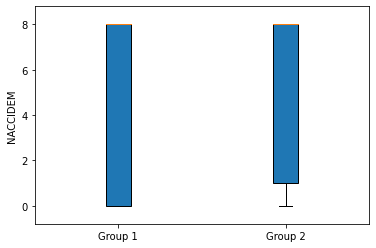

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./28/feature_selection.csv
./41/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NPHIST', 'DECSUB', 'NPOLD2', 'NACCDAGE', 'NACCAGEB'}
selected_features_common set()
selected_features_diff {'NACCAGE', 'NPHIST', 'DECSUB', 'NPOLD2', 'NACCDAGE', 'NACCAGEB'}
--------------------------------------------------
All different features 6




--------------------------------------------------------------------------------
Group 1: [72 90 70 ... 67 70 56]
Average of Group 1: 76.1301044634378
Group 2: [91 65 93 70 76 91 74 61 78 84 71 77 89 94 81 65 80 80 81 83 78 84 98 68
 77 90 67 98 95 71 63 54 83 79 92 87 92 85 86 62 87 86 86 81 84 96 80 85
 85 82 74 75 77 82 58 81 80 93 84 83 95 86 73 94 87 

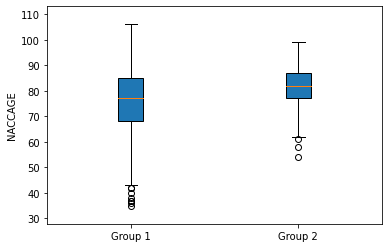



--------------------------------------------------------------------------------
Group 1: [0 0 0 ... 0 0 0]
Average of Group 1: 0.25071225071225073
Group 2: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
Average of Group 2: 0.11363636363636363
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.409729782160182, pvalue=0.00380383999157581)
Test: f_t, p_value_t 3.749798289356392 0.0002779791252144963
ANOVA: f, p_value: 8.40972978216013 0.00380383999157581
--------------------------------------------------------------------------------




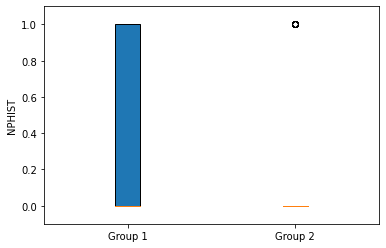



--------------------------------------------------------------------------------
Group 1: [1 0 1 ... 1 1 1]
Average of Group 1: 1.5099715099715099
Group 2: [0 1 8 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 8 1 1 0 1 8 0 0 1 0 0 8 0 8
 8 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 8 8 1 1 0 0 1 1 0 0 8 0 1 0 1 9
 1 1 1 0 8 1 0 1 0 1 1 0 0 1]
Average of Group 2: 1.5227272727272727
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.1079499127053272, pvalue=0.7425507061441328)
Test: f_t, p_value_t -0.04672084781174403 0.9627439044943129
ANOVA: f, p_value: 0.0021828376202481046 0.9627439044940994
--------------------------------------------------------------------------------




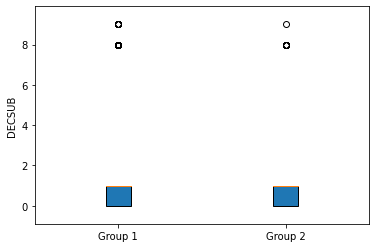



--------------------------------------------------------------------------------
Group 1: [3 0 0 ... 0 0 0]
Average of Group 1: 0.17094017094017094
Group 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Average of Group 2: 0.09090909090909091
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.7669481863744267, pvalue=0.38134745858673735)
Test: f_t, p_value_t 0.8757557800976404 0.3813474585871227
ANOVA: f, p_value: 0.766948186374427 0.38134745858673735
--------------------------------------------------------------------------------




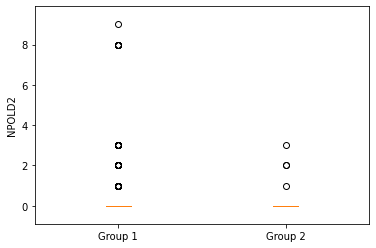



--------------------------------------------------------------------------------
Group 1: [77 90 70 ... 72 76 56]
Average of Group 1: 78.63817663817663
Group 2: [92 68 95 74 81 94 76 65 86 90 78 81 91 95 87 65 88 87 82 92 86 90 102 69
 78 94 69 103 95 72 67 58 84 80 92 92 94 85 86 64 88 89 87 91 88 102 83 90
 87 87 79 76 86 86 63 86 86 95 86 83 98 94 73 95 92 89 84 84 83 87 86 88
 75 86 86 102 85 100 76 82 84 84 88 88 87 92 67 90]
Average of Group 2: 84.88636363636364
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=13.472570986250414, pvalue=0.0002532876554982928)
Test: f_t, p_value_t -5.788596219443917 6.729011691285533e-08
ANOVA: f, p_value: 23.331178775248958 1.5496964648364593e-06
--------------------------------------------------------------------------------




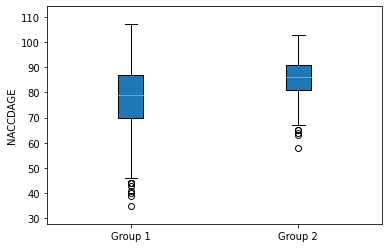



--------------------------------------------------------------------------------
Group 1: [65 85 67 ... 66 67 53]
Average of Group 1: 71.81101614434948
Group 2: [83 61 84 68 74 82 69 60 73 82 67 70 80 85 76 65 74 75 80 79 74 76 93 66
 75 88 65 93 85 69 62 53 76 72 81 84 81 70 82 59 87 78 83 79 81 90 78 81
 81 79 69 72 75 76 58 76 80 84 82 74 93 84 73 93 84 86 79 72 72 82 79 86
 68 77 78 95 74 87 65 75 78 73 78 84 80 85 62 82]
Average of Group 2: 77.02272727272727
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
var_same LeveneResult(statistic=6.6311147524444705, pvalue=0.010146541464487298)
Test: f_t, p_value_t -5.345698372782771 4.836166921132728e-07
ANOVA: f, p_value: 19.348618359594127 1.1909620268366147e-05
--------------------------------------------------------------------------------




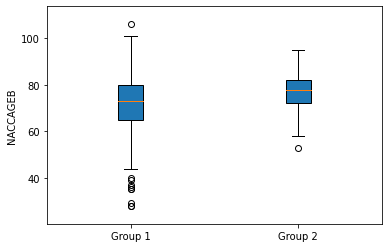

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





./28/feature_selection.csv
./45/feature_selection.csv
--------------------------------------------------


selected_features_all {'NACCAGE', 'NACCDAGE', 'NACCAGEB', 'NACCMMSE'}
selected_features_common {'NACCAGEB', 'NACCAGE'}
selected_features_diff {'NACCDAGE', 'NACCMMSE'}
--------------------------------------------------
All different features 2




--------------------------------------------------------------------------------
Group 1: [77 90 70 ... 72 76 56]
Average of Group 1: 78.63817663817663
Group 2: [98 92 72 76 88 90 103 84 76 95 68 68 84 79 84 93 82 83 95 74 89 88 76 81
 94 89 76 65 86 87 61 70 80 91 65 90 69 90 74 78 87 81 82 91 71 95 87 89
 88 97 91 83 79 92 87 88 74 75 85 82 77 77 87 73 90 83 69 87 82 72 87 92
 72 88 95 83 95 79

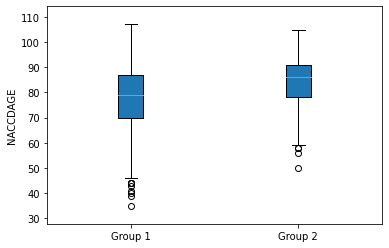

IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
used_number_features=3
Compared_groups=[(25,3),(25,32),(25,4),(25,49),(25,51),(28,35),(28,39),(28,40),(28,41),(28,45),(28,46),(3,4),(3,49),(3,51),(3,8),(32,50),(32,52),(32,8),(32,9),(35,45),(35,46),(39,40),(39,41),(4,49),(4,51),(4,9),(40,41),(45,46),(49,50),(49,51),(50,52),(51,52),(53,4),(53,54),(54,9),(8,50),(8,52),(8,9),(9,50),(9,52)]

print("Compared groups", len(Compared_groups))
print("\n\n\n")

features_common=False# "features_common=True" shows the bar figures for common selected features; features_all=True, it shows the bar figures for all union selected features, otherwise, it shows the bar figures for different union selected features.
features_all=False

for file_name_1,file_name_2 in Compared_groups:
    path1='./'+str(file_name_1)+'/feature_selection.csv'
    path2='./'+str(file_name_2)+'/feature_selection.csv'
    print(path1)
    print(path2)
    print("-"*50)
    print("\n")
    
    data1_,_=csv_read(path1)
    data1=data1_[-1,0:used_number_features]
    data2_,_=csv_read(path2)
    data2=data2_[-1,0:used_number_features]
    
    selected_features_all=set(data1).union(set(data2))
    selected_features_common=set(data1).intersection(set(data2))
    
    selected_features_diff=selected_features_all-selected_features_common
        
    print("selected_features_all",selected_features_all)
    print("selected_features_common",selected_features_common)
    print("selected_features_diff",selected_features_diff)
    print("-"*50)
    
    inputdata1,column_names1=csv_read_with_header('./'+str(file_name_1)+'/data/survival_data_filtered_3.csv')
    inputdata2,column_names2=csv_read_with_header('./'+str(file_name_2)+'/data/survival_data_filtered_3.csv')
                
    if features_common:
        selected_features_common_list=list(selected_features_common)
        print("Common features", len(selected_features_common_list))
        print("\n")
        
        for i in np.arange(len(selected_features_common_list)):
            index1_i=np.where(column_names1==selected_features_common_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_common_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_common_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
    elif features_all:
        selected_features_all_list=list(selected_features_all)
    
        print("All union features", len(selected_features_all_list))
        print("\n")
        
        for i in np.arange(len(selected_features_all_list)):
            index1_i=np.where(column_names1==selected_features_all_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_all_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_all_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
    else:
        selected_features_diff_list=list(selected_features_diff)
    
        print("All different features", len(selected_features_diff_list))
        print("\n")
        
        for i in np.arange(len(selected_features_diff_list)):
            index1_i=np.where(column_names1==selected_features_diff_list[i])[0][0]
            index2_i=np.where(column_names2==selected_features_diff_list[i])[0][0]
        
            group1=inputdata1[:,index1_i]
            group2=inputdata2[:,index2_i]
            y_label=selected_features_diff_list[i]
            
            print("\n")
            print("-"*80)
            print("Group 1:", group1)
            print("Average of Group 1:", np.mean(group1))
            print("Group 2:", group2)
            print("Average of Group 2:", np.mean(group2))
            print("-"*80)
            print("\n")
            
            statistic_analysis(group1, group2)

            bar_figure(group1,group2,y_label)
            
    
    print("%"*120)
    print("%"*120)
    print("\n\n\n\n")